### Crime Data Clustering

> <sub>⚠️ **Note**: Internal links (like Table of Contents) work best when this notebook is opened in **Jupyter Notebook** or **nbviewer.org**.<br>
> GitHub does **not support scrolling to sections** inside `.ipynb` files.</sub>

---
######  - [Reading Arrest Dataset](#Reading-Arrest-Dataset)
######  - [Processing Arrest Dataset](#Processing-Arrest-Dataset)
######  - [PCA to reduce number of Crime Columns](#PCA-to-reduce-number-of-Crime-Columns)
######  - [Adding PCA columns to dataset](#Adding-PCA-columns-to-dataset)
######  - [KMeans Clustering on dataset](#KMeans-Clustering-on-dataset)
######  - [Writing the dataset](#Writing-the-dataset)
---

#### Reading Arrest Dataset
######  - [_Click here to move back to index_](#Crime-Data-Clustering)

In [4]:
import sys
sys.path.append('src') 


In [5]:
from Data_Preprocessing import load_data

df = load_data('data/raw/NYPD_Arrests_Data__Historic__20250417.csv')


In [6]:
df['OFNS_DESC'].value_counts().reset_index().rename(columns={'index': 'OFNS_DESC', 'OFNS_DESC': 'count'}).head(5)

,count,count
0,DANGEROUS DRUGS,1144059
1,ASSAULT 3 & RELATED OFFENSES,645227
2,OTHER OFFENSES RELATED TO THEFT,316812
3,PETIT LARCENY,306203
4,FELONY ASSAULT,288434


#### Processing Arrest Dataset
######  - [_Click here to move back to index_](#Crime-Data-Clustering)

In [8]:
from Data_Preprocessing import process_arrest_data

df_pivot = process_arrest_data(df, min_year = 2010, top_n_offenses = 35)


In [9]:
df_pivot.head(5)

,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,year,month,year_month,ADMINISTRATIVE CODE,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,...,OTHER STATE LAWS,OTHER STATE LAWS (NON PENAL LAW),OTHER TRAFFIC INFRACTION,PETIT LARCENY,POSSESSION OF STOLEN PROPERTY,POSSESSION OF STOLEN PROPERTY 5,PROSTITUTION & RELATED OFFENSES,ROBBERY,SEX CRIMES,VEHICLE AND TRAFFIC LAWS
0,B,1,0.0,2017,10,2017-10,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,10,0.0,2019,9,2019-09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B,14,1.0,2017,11,2017-11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B,32,0.0,2016,5,2016-05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B,34,0.0,2015,8,2015-08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### PCA to reduce number of Crime Columns
######  - [_Click here to move back to index_](#Crime-Data-Clustering)

Columns with low variance (optional to drop): []


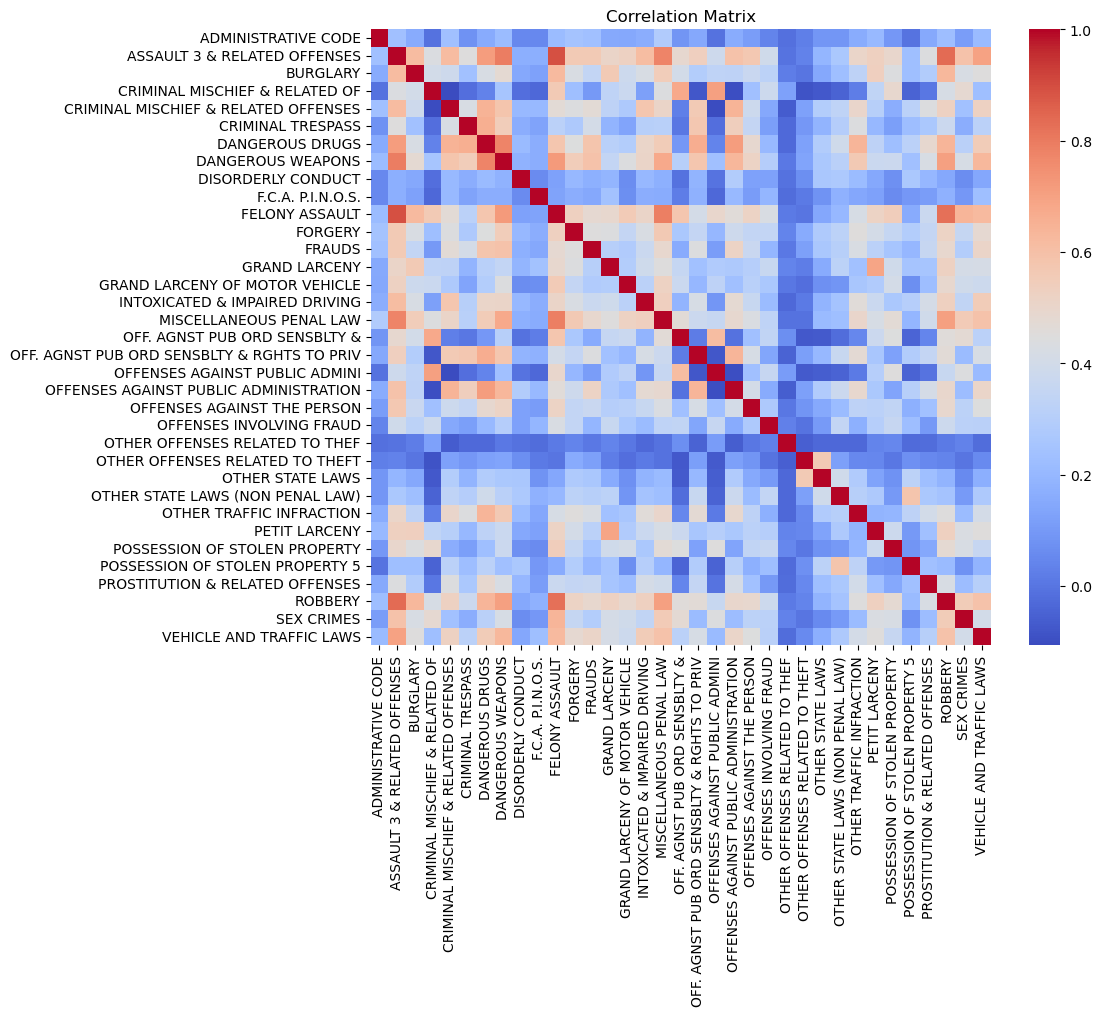

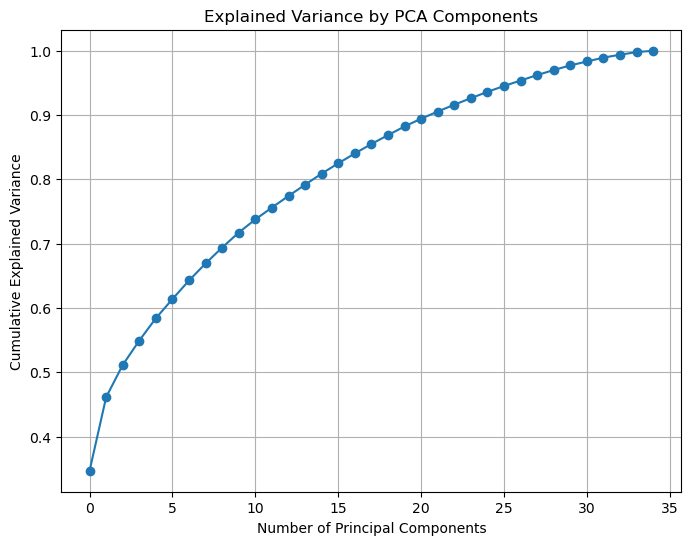


Top variable contributions to PC1:
ASSAULT 3 & RELATED OFFENSES                   0.265774
FELONY ASSAULT                                 0.248860
ROBBERY                                        0.245586
DANGEROUS WEAPONS                              0.241092
MISCELLANEOUS PENAL LAW                        0.235395
DANGEROUS DRUGS                                0.222700
VEHICLE AND TRAFFIC LAWS                       0.212407
BURGLARY                                       0.195440
FORGERY                                        0.193702
CRIMINAL MISCHIEF & RELATED OFFENSES           0.193648
INTOXICATED & IMPAIRED DRIVING                 0.191135
OFFENSES AGAINST PUBLIC ADMINISTRATION         0.191083
FRAUDS                                         0.185476
OTHER TRAFFIC INFRACTION                       0.175412
GRAND LARCENY                                  0.174963
OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV    0.174372
OFFENSES AGAINST THE PERSON                    0.174093
PETIT LARCEN

In [11]:
from Data_Preprocessing import perform_pca_analysis

exclude_columns = ["ARREST_BORO", "ARREST_PRECINCT", "JURISDICTION_CODE", "year", "month", "year_month"]
loadings, important_features = perform_pca_analysis(df_pivot, exclude_cols=exclude_columns)


#### Adding PCA columns to dataset
######  - [_Click here to move back to index_](#Crime-Data-Clustering)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Dictionary of PC names and their associated features
pc_groups = {
    'PC1': ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT', 'ROBBERY'],
    'PC2': ['CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFF. AGNST PUB ORD SENSBLTY &'],
    'PC3': ['OTHER STATE LAWS (NON PENAL LAW)', 'OTHER STATE LAWS', 'POSSESSION OF STOLEN PROPERTY 5'],
    'PC4': ['OTHER OFFENSES RELATED TO THEFT', 'F.C.A. P.I.N.O.S.'],
    'PC5': ['ADMINISTRATIVE CODE', 'CRIMINAL TRESPASS', 'PETIT LARCENY']
}

# Apply PCA to each group
for pc_name, features in pc_groups.items():
    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_pivot[features])

    # Apply PCA
    pca = PCA(n_components=1)
    pca_result = pca.fit_transform(scaled_data)

    # Add the new PCA component
    df_pivot[pc_name] = pca_result

    # Drop the original features
    df_pivot.drop(columns=features, inplace=True)

    # Print explained variance
    print(f"\nExplained variance by {pc_name} component:", pca.explained_variance_ratio_)



Explained variance by PC1 component: [0.90161641]

Explained variance by PC2 component: [0.77566242]

Explained variance by PC3 component: [0.62475715]

Explained variance by PC4 component: [0.50556335]

Explained variance by PC5 component: [0.44330436]


In [14]:
# Filter Data by Valid JURISDICTION_CODE Values

valid_codes = [0.0, 1.0, 2.0]

df_pivot = df_pivot[df_pivot['JURISDICTION_CODE'].isin(valid_codes)]

df_pivot.head(5)

df_pivot.shape


(33493, 32)

#### KMeans Clustering on dataset
######  - [_Click here to move back to index_](#Crime-Data-Clustering)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Extract just the offense columns (excluding ID/date columns)
feature_cols = df_pivot.columns.difference(["ARREST_BORO", "ARREST_PRECINCT", "JURISDICTION_CODE", "year", "month", "year_month"])
X = df_pivot[feature_cols]

# Step 2: Standardize offense counts
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering
k = 2  # Adjust based on your use case or silhouette score
kmeans = KMeans(n_clusters=k, random_state=42)
df_pivot['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4 (Optional): Analyze clusters
cluster_summary = df_pivot.groupby('cluster')[feature_cols].mean()
cluster_summary.round(2)


,BURGLARY,CRIMINAL MISCHIEF & RELATED OFFENSES,DANGEROUS DRUGS,DANGEROUS WEAPONS,DISORDERLY CONDUCT,FORGERY,FRAUDS,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,INTOXICATED & IMPAIRED DRIVING,...,OTHER TRAFFIC INFRACTION,PC1,PC2,PC3,PC4,PC5,POSSESSION OF STOLEN PROPERTY,PROSTITUTION & RELATED OFFENSES,SEX CRIMES,VEHICLE AND TRAFFIC LAWS
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.94,1.02,5.77,1.75,0.18,0.84,0.18,1.59,0.15,0.78,...,0.7,-0.36,-0.05,-0.10,0.08,-0.16,0.33,0.11,0.61,1.91
1,6.51,9.20,69.93,15.01,1.54,5.87,1.53,10.91,1.79,6.99,...,9.2,3.08,1.32,1.23,0.44,1.60,2.25,3.42,3.89,19.21


#### Writing the dataset
######  - [_Click here to move back to index_](#Crime-Data-Clustering)

In [18]:
from Data_Preprocessing import write_data

# Save to processed
write_data(df_pivot, 'Crime_Data_Clustered.csv')

Data written to: C:\Users\utkar\Desktop\PyCharm Projects Spring\Machine Learning for Business\data\processed\Crime_Data_Clustered.csv


'data\\processed\\Crime_Data_Clustered.csv'